In [1]:
#Import functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #graphic
import seaborn as sns

plt.style.use('seaborn')

# Exploratory Data Analysis (EDA)

In [2]:
#Attribute information
with open("forestfires.names", encoding = "ISO-8859-1") as f:
    print(f.read())

Attribute information:

   For more information, read [Cortez and Morais, 2007].

   1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
   2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
   3. month - month of the year: "jan" to "dec" 
   4. day - day of the week: "mon" to "sun"
   5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
   6. DMC - DMC index from the FWI system: 1.1 to 291.3 
   7. DC - DC index from the FWI system: 7.9 to 860.6 
   8. ISI - ISI index from the FWI system: 0.0 to 56.10
   9. temp - temperature in Celsius degrees: 2.2 to 33.30
   10. RH - relative humidity in %: 15.0 to 100
   11. wind - wind speed in km/h: 0.40 to 9.40 
   12. rain - outside rain in mm/m2 : 0.0 to 6.4 
   13. area - the burned area of the forest (in ha): 0.00 to 1090.84 
   (this output variable is very skewed towards 0.0, thus it may make
    sense to model with the logarithm transform). 


In [3]:
#Import CSV
df_ff = pd.read_csv('forestfires.csv')
df_ff.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [4]:
#Check for nulls
#sum() is done twice to get total rows with null values from all columns/features
df_ff.isna().sum().sum()

0

In [ ]:
#Table summary
df_ff.describe().T

In [ ]:
df_ff.plot(kind='scatter', x='X', y='Y', alpha=0.2, s=10*df_ff['area'], color='red')

In [ ]:
#Skew and kurtosis
print("Skew: \n{}".format(df_ff.skew()))
print("Kurtosis: \n{}".format(df_ff.kurtosis()))

- If skewness is less than −1 or greater than +1, the distribution is highly skewed.
- If skewness is between −1 and −½ or between +½ and +1, the distribution is moderately skewed.
- If skewness is between −½ and +½, the distribution is approximately symmetric.

- A normal distribution has kurtosis exactly 3 (excess kurtosis exactly 0). Any distribution with kurtosis ≈3 (excess ≈0) is called mesokurtic.
- A distribution with kurtosis <3 (excess kurtosis <0 ) is called platykurtic. Compared to a normal distribution, its tails are shorter and thinner, and often its central peak is lower and broader.
- A distribution with kurtosis >3 (excess kurtosis >0) is called leptokurtic. Compared to a normal distribution, its tails are longer and fatter, and often its central peak is higher and sharper.

In [ ]:
#plot FFMC
plt.figure(figsize=(10,5))
ax = sns.kdeplot(df_ff['FFMC'],shade=True,color='b')
plt.xticks([i for i in range(0,100,5)])
plt.show()
#FFMC is left skewed

In [ ]:
#plot temp
plt.figure(figsize=(10,5))
ax = sns.kdeplot(df_ff['temp'],shade=True,color='b')
plt.xticks([i for i in range(0,40,5)])
plt.show()
#FFMC is approximately symmetric

In [ ]:
#plot ISI
plt.figure(figsize=(10,5))
ax = sns.kdeplot(df_ff['ISI'],shade=True,color='b')
plt.xticks([i for i in range(0,60,5)])
plt.show()
#ISI is right skewed

In [ ]:
#plot area
plt.figure(figsize=(10,5))
ax = sns.kdeplot(df_ff['area'],shade=True,color='b')
plt.xticks([i for i in range(0,1000,100)])
plt.show()
#ISI is right skewed with high kurtosis

In [ ]:
#Boxplot to investigate probability of outliers
ax = sns.boxplot(df_ff['area'])

In [ ]:
#Get outliers
outliers = df_ff[df_ff['area'] >= 200] #200 is an arbitrary number based on the boxplot above
outliers

In [ ]:
#Get Dtype
df_ff.info()

In [ ]:
df_wo_area = df_ff.drop(columns='area')
categorical = df_wo_area.select_dtypes(include='object').columns.tolist()
numerical = df_wo_area.select_dtypes(exclude='object').columns.tolist()

In [ ]:
for i,col in enumerate(categorical,1):
    plt.subplot(2,2,i)
    sns.countplot(data=df_wo_area,y=col)
    plt.subplot(2,2,i+2)
    df_ff[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()

In [ ]:
# Plot overall histogram
df_ff.hist(bins=30, figsize=(15,10))

Features with skews and kurtosis: FFMC, ISI, rain

In [ ]:
#plot area
target_plot = df_ff[df_ff['area'] <= 100]
plt.figure(figsize=(10,5))
ax = sns.kdeplot(target_plot['area'],shade=True,color='b')
plt.xticks([i for i in range(0,100,5)])
plt.show()
#ISI is right skewed with high kurtosis

In [5]:
# Categorizing severity of forest fire based on area
def area_cat(area):
    if area == 0.0:
        return "No damage"
    elif area <= 1:
        return "low"
    elif area <= 25:
        return "moderate"
    elif area <= 100:
        return "high"
    else:
        return "very high"

df_ff['damage_category'] = df_ff['area'].apply(area_cat)
df_ff.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,damage_category
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,No damage
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,No damage
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,No damage
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,No damage
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,No damage


In [ ]:
for col in categorical:
    cross = pd.crosstab(index=df_ff['damage_category'],columns=df_ff[col],normalize='index')
    cross.plot.barh(stacked=True,rot=40,cmap='tab20')
    plt.xlabel('% distribution per category')
    plt.xticks(np.arange(0,1.1,0.1))
    plt.title("Forestfire damage each {}".format(col))

plt.legend(loc='upper right')
plt.show()

In [ ]:
target = df_ff['area']

In [ ]:
plt.figure(figsize=(20,40))
for i,col in enumerate(numerical,1):
    plt.subplot(10,1,i)
    if col in ['X','Y']:
        sns.swarmplot(data=df_ff,x=col,y=target,hue='damage_category')
    else:
        sns.scatterplot(data=df_ff,x=col,y=target,hue='damage_category')
plt.show()

In [6]:
df_ff['target'] = df_ff['damage_category'].replace(['No damage','low','moderate','high','very high'],[0,1,2,3,4])
df_ff = df_ff.drop(['damage_category','area'],axis=1)

## Model Building

In [7]:
from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

In [8]:
X = df_ff.drop(['target'],axis=1)
y = df_ff['target']
print('Input', X.shape)
print('Output', y.shape)

# X = df_ff.iloc[:, 0:12].values # independent
# y = df_ff.iloc[:, 12].values # dependent variable

Input (517, 12)
Output (517,)


In [9]:
# Encoding categorical data for independent variables 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
# X[':, 2'] = labelencoder_X_1.fit_transform(X[:, 2]) #For month
X['month'] = labelencoder_X_1.fit_transform(X['month']) #For month
labelencoder_X_2 = LabelEncoder()
# X[:, 3] = labelencoder_X_2.fit_transform(X[:, 3]) #For weekday
X['day'] = labelencoder_X_2.fit_transform(X['day']) #For weekday

In [10]:
X.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,7,5,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0
1,7,4,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0
2,7,4,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0
3,8,6,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2
4,8,6,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0


In [15]:
encoded = pd.get_dummies(X['month'], prefix='Month')
encoded

,Month_0,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11
0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
512,0,1,0,0,0,0,0,0,0,0,0,0
513,0,1,0,0,0,0,0,0,0,0,0,0
514,0,1,0,0,0,0,0,0,0,0,0,0
515,0,1,0,0,0,0,0,0,0,0,0,0


In [16]:
X_new = X.join(encoded)
X_new.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,...,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11
0,7,5,7,0,86.2,26.2,94.3,5.1,8.2,51,...,0,0,0,0,0,1,0,0,0,0
1,7,4,10,5,90.6,35.4,669.1,6.7,18.0,33,...,0,0,0,0,0,0,0,0,1,0
2,7,4,10,2,90.6,43.7,686.9,6.7,14.6,33,...,0,0,0,0,0,0,0,0,1,0
3,8,6,7,0,91.7,33.3,77.5,9.0,8.3,97,...,0,0,0,0,0,1,0,0,0,0
4,8,6,7,3,89.3,51.3,102.2,9.6,11.4,99,...,0,0,0,0,0,1,0,0,0,0


In [20]:
encoded_1 = pd.get_dummies(X_new['day'], prefix='day')
encoded_1

,day_0,day_1,day_2,day_3,day_4,day_5,day_6
0,1,0,0,0,0,0,0
1,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0
4,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...
512,0,0,0,1,0,0,0
513,0,0,0,1,0,0,0
514,0,0,0,1,0,0,0
515,0,0,1,0,0,0,0


In [21]:
X_new_1 = X_new.join(encoded_1)
X_new_1.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,...,Month_9,Month_10,Month_11,day_0,day_1,day_2,day_3,day_4,day_5,day_6
0,7,5,7,0,86.2,26.2,94.3,5.1,8.2,51,...,0,0,0,1,0,0,0,0,0,0
1,7,4,10,5,90.6,35.4,669.1,6.7,18.0,33,...,0,1,0,0,0,0,0,0,1,0
2,7,4,10,2,90.6,43.7,686.9,6.7,14.6,33,...,0,1,0,0,0,1,0,0,0,0
3,8,6,7,0,91.7,33.3,77.5,9.0,8.3,97,...,0,0,0,1,0,0,0,0,0,0
4,8,6,7,3,89.3,51.3,102.2,9.6,11.4,99,...,0,0,0,0,0,0,1,0,0,0


In [22]:
X_new_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   X         517 non-null    int64  
 1   Y         517 non-null    int64  
 2   month     517 non-null    int64  
 3   day       517 non-null    int64  
 4   FFMC      517 non-null    float64
 5   DMC       517 non-null    float64
 6   DC        517 non-null    float64
 7   ISI       517 non-null    float64
 8   temp      517 non-null    float64
 9   RH        517 non-null    int64  
 10  wind      517 non-null    float64
 11  rain      517 non-null    float64
 12  Month_0   517 non-null    uint8  
 13  Month_1   517 non-null    uint8  
 14  Month_2   517 non-null    uint8  
 15  Month_3   517 non-null    uint8  
 16  Month_4   517 non-null    uint8  
 17  Month_5   517 non-null    uint8  
 18  Month_6   517 non-null    uint8  
 19  Month_7   517 non-null    uint8  
 20  Month_8   517 non-null    uint8 

In [23]:
X = X_new_1.copy()
X = X.drop(['month','day'],axis=1)

In [ ]:
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([("month", OneHotEncoder(), [2])], remainder = 'passthrough')
X = ct.fit_transform(X)

ct_2 = ColumnTransformer([("day", OneHotEncoder(), [3])], remainder = 'passthrough')
X = ct_2.fit_transform(X)

In [ ]:
onehotencoder = OneHotEncoder()#dummy variable for month
X = onehotencoder.fit_transform(X).toarray()
X = X[:, 1:] #avoid dummy variable trap 
onehotencoder = OneHotEncoder()#dummy variable for week
X = onehotencoder.fit_transform(X).toarray()
X = X[:, 1:] #avoid dummy variable trap

In [24]:
y = to_categorical(y)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
y_train = np.asarray(target).astype('float32').reshape((-1,1))
y_test = np.asarray(target).astype('float32').reshape((-1,1))

In [27]:
model = Sequential(name='forest_fire_mod')
model.add(Dense(50, input_dim=29, activation='relu', kernel_initializer='uniform')) #input layer and 1st hidden layer
model.add(Dense(17, activation='relu', kernel_initializer='uniform')) #2nd hidden layer
model.add(Dense(17, activation='relu', kernel_initializer='uniform')) #3rd hidden layer
model.add(Dense(5, activation='softmax', kernel_initializer='uniform')) #output layer

model.summary()

Model: "forest_fire_mod"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                1500      
_________________________________________________________________
dense_1 (Dense)              (None, 17)                867       
_________________________________________________________________
dense_2 (Dense)              (None, 17)                306       
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 90        
Total params: 2,763
Trainable params: 2,763
Non-trainable params: 0
_________________________________________________________________


In [28]:
optimizer = SGD(lr=0.01,momentum=0.7)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

/Users/pt.gojekindonesia/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [29]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=5, verbose=1)

Epoch 1/100
73/73 [==============================] - 1s 4ms/step - loss: 0.6322 - accuracy: 0.4100 - val_loss: 0.4287 - val_accuracy: 0.4936
Epoch 2/100
73/73 [==============================] - 0s 2ms/step - loss: 0.4019 - accuracy: 0.4709 - val_loss: 0.3725 - val_accuracy: 0.4936
Epoch 3/100
73/73 [==============================] - 0s 3ms/step - loss: 0.3935 - accuracy: 0.4709 - val_loss: 0.3736 - val_accuracy: 0.4936
Epoch 4/100
73/73 [==============================] - 0s 4ms/step - loss: 0.3912 - accuracy: 0.4709 - val_loss: 0.3720 - val_accuracy: 0.4936
Epoch 5/100
73/73 [==============================] - 0s 2ms/step - loss: 0.3899 - accuracy: 0.4709 - val_loss: 0.3726 - val_accuracy: 0.4936
Epoch 6/100
73/73 [==============================] - 0s 2ms/step - loss: 0.3896 - accuracy: 0.4709 - val_loss: 0.3749 - val_accuracy: 0.4936
Epoch 7/100
73/73 [==============================] - 0s 2ms/step - loss: 0.3888 - accuracy: 0.4709 - val_loss: 0.3747 - val_accuracy: 0.4936
Epoch 8/100
7

Epoch 59/100
73/73 [==============================] - 0s 2ms/step - loss: 0.3103 - accuracy: 0.5762 - val_loss: 0.4516 - val_accuracy: 0.5000
Epoch 60/100
73/73 [==============================] - 0s 2ms/step - loss: 0.3069 - accuracy: 0.5928 - val_loss: 0.4801 - val_accuracy: 0.4936
Epoch 61/100
73/73 [==============================] - 0s 2ms/step - loss: 0.3048 - accuracy: 0.5928 - val_loss: 0.4723 - val_accuracy: 0.4936
Epoch 62/100
73/73 [==============================] - 0s 2ms/step - loss: 0.3003 - accuracy: 0.6039 - val_loss: 0.4745 - val_accuracy: 0.5128
Epoch 63/100
73/73 [==============================] - 0s 2ms/step - loss: 0.2983 - accuracy: 0.6233 - val_loss: 0.4622 - val_accuracy: 0.5449
Epoch 64/100
73/73 [==============================] - 0s 3ms/step - loss: 0.2932 - accuracy: 0.6205 - val_loss: 0.4749 - val_accuracy: 0.5321
Epoch 65/100
73/73 [==============================] - 0s 3ms/step - loss: 0.2915 - accuracy: 0.6066 - val_loss: 0.4926 - val_accuracy: 0.5256
Epoch 

In [30]:
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, valid_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Valid: %.3f' % (train_acc, valid_acc))

Train: 0.812, Valid: 0.519


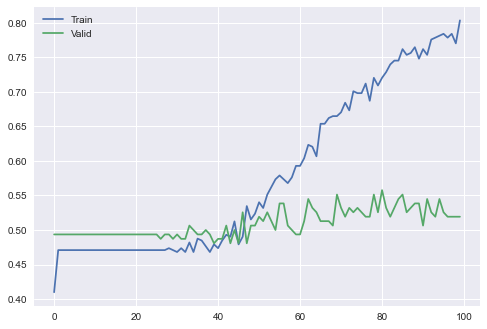

In [31]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Valid')
plt.legend()
plt.show()

In [39]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500, batch_size=1, verbose=1)

Epoch 1/500
361/361 [==============================] - 2s 4ms/step - loss: 0.3194 - accuracy: 0.6814 - val_loss: 0.7106 - val_accuracy: 0.4038
Epoch 2/500
361/361 [==============================] - 1s 3ms/step - loss: 0.2618 - accuracy: 0.6981 - val_loss: 0.6304 - val_accuracy: 0.4679
Epoch 3/500
361/361 [==============================] - 1s 3ms/step - loss: 0.2402 - accuracy: 0.7064 - val_loss: 0.7800 - val_accuracy: 0.4551
Epoch 4/500
361/361 [==============================] - 1s 2ms/step - loss: 0.2323 - accuracy: 0.7341 - val_loss: 0.7594 - val_accuracy: 0.5256
Epoch 5/500
361/361 [==============================] - 1s 3ms/step - loss: 0.2083 - accuracy: 0.7424 - val_loss: 0.7955 - val_accuracy: 0.5192
Epoch 6/500
361/361 [==============================] - 1s 3ms/step - loss: 0.2021 - accuracy: 0.7756 - val_loss: 0.8457 - val_accuracy: 0.5000
Epoch 7/500
361/361 [==============================] - 1s 2ms/step - loss: 0.1943 - accuracy: 0.7867 - val_loss: 0.9297 - val_accuracy: 0.5000

Epoch 58/500
361/361 [==============================] - 1s 1ms/step - loss: 0.1096 - accuracy: 0.9114 - val_loss: 1.8396 - val_accuracy: 0.4744
Epoch 59/500
361/361 [==============================] - 1s 2ms/step - loss: 0.0951 - accuracy: 0.9280 - val_loss: 1.7685 - val_accuracy: 0.4679
Epoch 60/500
361/361 [==============================] - 1s 2ms/step - loss: 0.1265 - accuracy: 0.8809 - val_loss: 1.7692 - val_accuracy: 0.4423
Epoch 61/500
361/361 [==============================] - 1s 2ms/step - loss: 0.1395 - accuracy: 0.8920 - val_loss: 1.9231 - val_accuracy: 0.4679
Epoch 62/500
361/361 [==============================] - 1s 2ms/step - loss: 0.1037 - accuracy: 0.9003 - val_loss: 1.8395 - val_accuracy: 0.4872
Epoch 63/500
361/361 [==============================] - 1s 2ms/step - loss: 0.0989 - accuracy: 0.9280 - val_loss: 2.0598 - val_accuracy: 0.5000
Epoch 64/500
361/361 [==============================] - 1s 2ms/step - loss: 0.0998 - accuracy: 0.9224 - val_loss: 1.9656 - val_accuracy:

361/361 [==============================] - 1s 2ms/step - loss: 0.0812 - accuracy: 0.9252 - val_loss: 2.8188 - val_accuracy: 0.4679
Epoch 115/500
361/361 [==============================] - 1s 2ms/step - loss: 0.0900 - accuracy: 0.9363 - val_loss: 3.0029 - val_accuracy: 0.4744
Epoch 116/500
361/361 [==============================] - 1s 2ms/step - loss: 0.0691 - accuracy: 0.9474 - val_loss: 2.8850 - val_accuracy: 0.4679
Epoch 117/500
361/361 [==============================] - 1s 2ms/step - loss: 0.0437 - accuracy: 0.9529 - val_loss: 2.8302 - val_accuracy: 0.4936
Epoch 118/500
361/361 [==============================] - 1s 2ms/step - loss: 0.0360 - accuracy: 0.9695 - val_loss: 2.8527 - val_accuracy: 0.4936
Epoch 119/500
361/361 [==============================] - 1s 2ms/step - loss: 0.0345 - accuracy: 0.9723 - val_loss: 2.9064 - val_accuracy: 0.4872
Epoch 120/500
361/361 [==============================] - 1s 2ms/step - loss: 0.0389 - accuracy: 0.9640 - val_loss: 2.8122 - val_accuracy: 0.4808

361/361 [==============================] - 1s 1ms/step - loss: 0.0204 - accuracy: 0.9806 - val_loss: 3.3060 - val_accuracy: 0.4551
Epoch 171/500
361/361 [==============================] - 1s 1ms/step - loss: 0.0241 - accuracy: 0.9778 - val_loss: 3.4535 - val_accuracy: 0.4679
Epoch 172/500
361/361 [==============================] - 1s 2ms/step - loss: 0.0194 - accuracy: 0.9806 - val_loss: 3.5026 - val_accuracy: 0.4615
Epoch 173/500
361/361 [==============================] - 1s 2ms/step - loss: 0.0292 - accuracy: 0.9806 - val_loss: 3.3967 - val_accuracy: 0.4487
Epoch 174/500
361/361 [==============================] - 1s 2ms/step - loss: 0.0349 - accuracy: 0.9695 - val_loss: 3.3909 - val_accuracy: 0.4423
Epoch 175/500
361/361 [==============================] - 1s 2ms/step - loss: 0.0722 - accuracy: 0.9363 - val_loss: 3.3883 - val_accuracy: 0.4231
Epoch 176/500
361/361 [==============================] - 1s 2ms/step - loss: 0.0785 - accuracy: 0.9418 - val_loss: 3.4132 - val_accuracy: 0.4744

361/361 [==============================] - 1s 2ms/step - loss: 0.0170 - accuracy: 0.9834 - val_loss: 4.0072 - val_accuracy: 0.4423
Epoch 227/500
361/361 [==============================] - 1s 2ms/step - loss: 0.0196 - accuracy: 0.9806 - val_loss: 4.1286 - val_accuracy: 0.4487
Epoch 228/500
361/361 [==============================] - 1s 2ms/step - loss: 0.0272 - accuracy: 0.9695 - val_loss: 4.1066 - val_accuracy: 0.4551
Epoch 229/500
361/361 [==============================] - 1s 2ms/step - loss: 0.0239 - accuracy: 0.9778 - val_loss: 4.0086 - val_accuracy: 0.4359
Epoch 230/500
361/361 [==============================] - 1s 2ms/step - loss: 0.0193 - accuracy: 0.9834 - val_loss: 4.1189 - val_accuracy: 0.4295
Epoch 231/500
361/361 [==============================] - 1s 3ms/step - loss: 0.0195 - accuracy: 0.9778 - val_loss: 4.0191 - val_accuracy: 0.4487
Epoch 232/500
361/361 [==============================] - 1s 2ms/step - loss: 0.0344 - accuracy: 0.9751 - val_loss: 4.1869 - val_accuracy: 0.4551

361/361 [==============================] - 1s 2ms/step - loss: 0.0131 - accuracy: 0.9834 - val_loss: 4.4135 - val_accuracy: 0.4295
Epoch 283/500
361/361 [==============================] - 1s 2ms/step - loss: 0.0123 - accuracy: 0.9778 - val_loss: 4.5007 - val_accuracy: 0.4167
Epoch 284/500
361/361 [==============================] - 1s 2ms/step - loss: 0.0106 - accuracy: 0.9834 - val_loss: 4.6439 - val_accuracy: 0.4423
Epoch 285/500
361/361 [==============================] - 1s 3ms/step - loss: 0.0164 - accuracy: 0.9778 - val_loss: 4.6324 - val_accuracy: 0.4551
Epoch 286/500
361/361 [==============================] - 1s 2ms/step - loss: 0.0133 - accuracy: 0.9806 - val_loss: 4.7960 - val_accuracy: 0.4359
Epoch 287/500
361/361 [==============================] - 1s 2ms/step - loss: 0.0152 - accuracy: 0.9723 - val_loss: 4.6812 - val_accuracy: 0.4167
Epoch 288/500
361/361 [==============================] - 1s 2ms/step - loss: 0.0251 - accuracy: 0.9889 - val_loss: 4.6714 - val_accuracy: 0.4487

361/361 [==============================] - 1s 2ms/step - loss: 0.0099 - accuracy: 0.9834 - val_loss: 4.6865 - val_accuracy: 0.4487
Epoch 339/500
361/361 [==============================] - 1s 1ms/step - loss: 0.0091 - accuracy: 0.9861 - val_loss: 4.6424 - val_accuracy: 0.4487
Epoch 340/500
361/361 [==============================] - 1s 1ms/step - loss: 0.0102 - accuracy: 0.9834 - val_loss: 4.6668 - val_accuracy: 0.4487
Epoch 341/500
361/361 [==============================] - 1s 1ms/step - loss: 0.0091 - accuracy: 0.9889 - val_loss: 4.7915 - val_accuracy: 0.4551
Epoch 342/500
361/361 [==============================] - 1s 1ms/step - loss: 0.0116 - accuracy: 0.9834 - val_loss: 4.7605 - val_accuracy: 0.4551
Epoch 343/500
361/361 [==============================] - 1s 1ms/step - loss: 0.0107 - accuracy: 0.9834 - val_loss: 4.7690 - val_accuracy: 0.4551
Epoch 344/500
361/361 [==============================] - 1s 1ms/step - loss: 0.0516 - accuracy: 0.9695 - val_loss: 4.9309 - val_accuracy: 0.4295

361/361 [==============================] - 1s 1ms/step - loss: 0.0081 - accuracy: 0.9834 - val_loss: 4.6593 - val_accuracy: 0.4359
Epoch 395/500
361/361 [==============================] - 1s 1ms/step - loss: 0.0078 - accuracy: 0.9889 - val_loss: 4.6354 - val_accuracy: 0.4359
Epoch 396/500
361/361 [==============================] - 1s 2ms/step - loss: 0.0109 - accuracy: 0.9834 - val_loss: 4.7626 - val_accuracy: 0.4423
Epoch 397/500
361/361 [==============================] - 1s 2ms/step - loss: 0.0256 - accuracy: 0.9751 - val_loss: 4.6251 - val_accuracy: 0.4231
Epoch 398/500
361/361 [==============================] - 1s 2ms/step - loss: 0.0277 - accuracy: 0.9751 - val_loss: 4.5326 - val_accuracy: 0.4231
Epoch 399/500
361/361 [==============================] - 1s 2ms/step - loss: 0.0538 - accuracy: 0.9640 - val_loss: 4.4428 - val_accuracy: 0.4295
Epoch 400/500
361/361 [==============================] - 1s 2ms/step - loss: 0.0301 - accuracy: 0.9806 - val_loss: 4.7028 - val_accuracy: 0.4231

361/361 [==============================] - 1s 2ms/step - loss: 0.0071 - accuracy: 0.9861 - val_loss: 5.9029 - val_accuracy: 0.4167
Epoch 451/500
361/361 [==============================] - 1s 2ms/step - loss: 0.0071 - accuracy: 0.9861 - val_loss: 5.9730 - val_accuracy: 0.4231
Epoch 452/500
361/361 [==============================] - 1s 2ms/step - loss: 0.0133 - accuracy: 0.9806 - val_loss: 6.1029 - val_accuracy: 0.4295
Epoch 453/500
361/361 [==============================] - 1s 2ms/step - loss: 0.0076 - accuracy: 0.9889 - val_loss: 6.2905 - val_accuracy: 0.4423
Epoch 454/500
361/361 [==============================] - 1s 2ms/step - loss: 0.0199 - accuracy: 0.9834 - val_loss: 5.8582 - val_accuracy: 0.4423
Epoch 455/500
361/361 [==============================] - 1s 2ms/step - loss: 0.0286 - accuracy: 0.9640 - val_loss: 6.1690 - val_accuracy: 0.4231
Epoch 456/500
361/361 [==============================] - 1s 2ms/step - loss: 0.3270 - accuracy: 0.9280 - val_loss: 5.2419 - val_accuracy: 0.4295

In [40]:
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, valid_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Valid: %.3f' % (train_acc, valid_acc))

Train: 0.989, Valid: 0.397


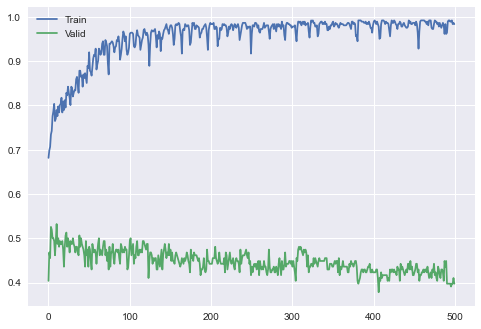

In [41]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Valid')
plt.legend()
plt.show()

In [37]:
# Importing the Keras libraries and packages to use Tensor Flow Backend
import keras
from keras.models import Sequential #For Initializing ANN
from keras.layers import Dense #For Layers of ANN
# Initializing the ANN with sequence of layers (Could use a Graph)
#Classifier Model
classifier = Sequential()
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 17, kernel_initializer = 'uniform', activation = 'relu', input_dim = 29))
# Adding the hidden layers
classifier.add(Dense(units = 17, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 17, kernel_initializer = 'uniform', activation = 'relu'))
# Adding the output layer
# Probability for the outcome 
classifier.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'softmax'))
# Compiling the ANN
'''Classification'''
#Another Option: categorical_crossentropy
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [38]:
classifier.fit(X_train, y_train, batch_size = 5, epochs = 100)

Epoch 1/100


ValueError: in user code:

    /Users/pt.gojekindonesia/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py:853 train_function  *
        return step_function(self, iterator)
    /Users/pt.gojekindonesia/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py:842 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /Users/pt.gojekindonesia/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Users/pt.gojekindonesia/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Users/pt.gojekindonesia/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    /Users/pt.gojekindonesia/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py:835 run_step  **
        outputs = model.train_step(data)
    /Users/pt.gojekindonesia/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py:787 train_step
        y_pred = self(x, training=True)
    /Users/pt.gojekindonesia/opt/anaconda3/lib/python3.8/site-packages/keras/engine/base_layer.py:1020 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /Users/pt.gojekindonesia/opt/anaconda3/lib/python3.8/site-packages/keras/engine/input_spec.py:250 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential_2 is incompatible with the layer: expected axis -1 of input shape to have value 28 but received input with shape (None, 29)


In [ ]:
_, train_acc = classifier.evaluate(X_train, y_train, verbose=0)
_, valid_acc = classifier.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Valid: %.3f' % (train_acc, valid_acc))

In [ ]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Valid')
plt.legend()
plt.show()